In [1]:
import numpy as np

import matplotlib.pyplot as plt

from keras.models import Sequential

from keras.layers import Dense , Conv2D, Flatten, MaxPooling2D

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [3]:
from PIL import Image
import numpy as np

target_size = (224, 224)

def preprocess_image(img):
    # Convert image to PIL Image
    pil_img = Image.fromarray(img)

    # Crop or pad to maintain the aspect ratio
    pil_img = pil_img.resize(target_size)

    # Convert back to NumPy array
    processed_img = np.array(pil_img)

    return processed_img

In [4]:
import os
import cv2
import numpy as np

# def convert_to_grayscale(image):
#     gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     return gray_image

def data_loader(mypath):
    obj_list = [folder for folder in os.listdir(mypath) if os.path.isdir(os.path.join(mypath, folder))]
    num_classes = len(obj_list)

    dataLst = []
    valueLst = []

    for label, folder in enumerate(obj_list):
        path1 = os.path.join(mypath, str(folder))
        images = os.listdir(path1)

        for file in images:
            path2 = os.path.join(path1, str(file))

            # Read the image from the directory
            img = cv2.imread(path2)
            img= preprocess_image(img)
            # img_bw = convert_to_grayscale(img)

            # Append image to the train data list
            dataLst.append(img)
            
            # Append class-label corresponding to the image
            valueLst.append(label)

        # Loading testing data
    
    dataLst= np.asarray(dataLst)
    valueLst = np.asarray(valueLst)
    label_to_folder = {label: folder for label, folder in enumerate(obj_list)}

    return dataLst, valueLst,label_to_folder

# path specified by the user
mypath="/kaggle/input/flowers-recognition/flowers"
Data, label,label_to_folder =data_loader(mypath)

print("Loading Done")


Loading Done


In [5]:
import pandas as pd
num_lst=list(label_to_folder.keys())
print(label_to_folder[0], label_to_folder[1],label_to_folder[2],label_to_folder[3],label_to_folder[4])
label_lst=list(label_to_folder.values())
mydict={}
mydict["numbers"]=num_lst
mydict["labels"]=label_lst
df=pd.DataFrame(mydict)
df.to_csv("myfile.csv")
np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)

dandelion daisy sunflower tulip rose


NameError: name 'rn' is not defined

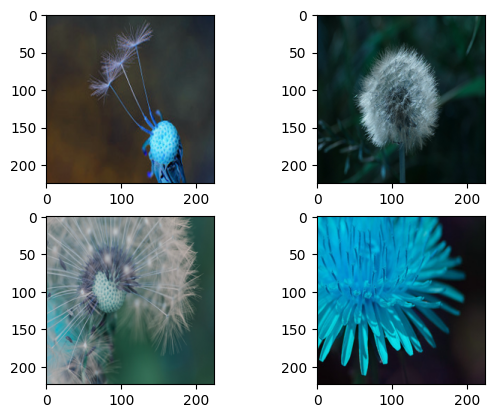

In [6]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(Data[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(Data[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(Data[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(Data[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

[3 0 0 ... 3 4 0]
train-set shape: (3885, 224, 224, 3)
test-set shape: (432, 224, 224, 3)
train-label shape: (3885,)
test-label shape: (432,)
5


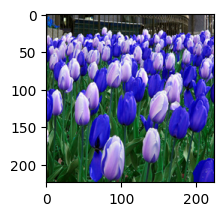

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data, label, test_size=0.1, random_state=42)
plt.subplot(221)
X_train=X_train/255.0
X_test=X_test/255.0

plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.imshow(X_train[24], cmap=plt.get_cmap('gray'))
print(y_train)
print("train-set shape:", X_train.shape)
print("test-set shape:", X_test.shape)
print("train-label shape:", y_train.shape)
print("test-label shape:", y_test.shape)
class_no=0
mydict={}
for i in y_test:
    if i not in mydict:
        mydict[i]=1
        class_no+=1
    else:
        pass
print(class_no)

In [12]:
input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])

# y_train_encoded = to_categorical(y_train, num_classes=5)
# y_test_encoded = to_categorical(y_test, num_classes=5)


In [13]:
 import tensorflow as tf
input_layer=tf.keras.layers.Input([224,224,3])
conv1=tf.keras.layers.Conv2D(filters=32,kernel_size=(5,5),padding="Same",activation="relu")(input_layer)
pool1=tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)
conv2=tf.keras.layers.Conv2D(filters=64,kernel_size=(5,5),padding="Same",activation="relu")(pool1)
pool2=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv2)
conv3=tf.keras.layers.Conv2D(filters=96,kernel_size=(5,5),padding="Same",activation="relu")(pool2)
pool3=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv3)
conv4=tf.keras.layers.Conv2D(filters=96,kernel_size=(5,5),padding="Same",activation="relu")(pool3)
pool4=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv4)
flt1=tf.keras.layers.Flatten()(pool4)
dn1=tf.keras.layers.Dense(512,activation="relu")(flt1)
out=tf.keras.layers.Dense(5,activation="softmax")(dn1)
model=tf.keras.Model(input_layer,out)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 64)      51264     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 56, 56, 96)        1536

In [14]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/2
61/61 [==============================] - 110s 2s/step - loss: 0.0106 - accuracy: 0.9987 - val_loss: 2.3183 - val_accuracy: 0.7292
Epoch 2/2
61/61 [==============================] - 109s 2s/step - loss: 0.0071 - accuracy: 0.9987 - val_loss: 2.3550 - val_accuracy: 0.7361


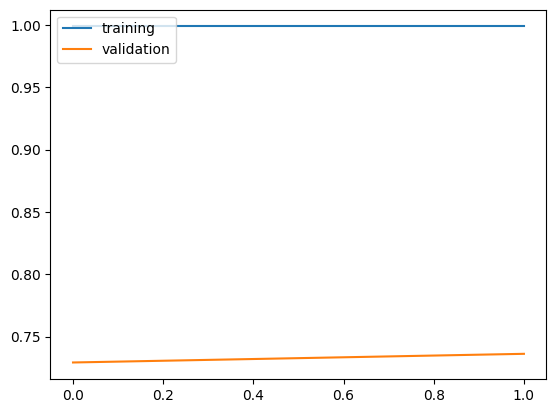

In [25]:
import random
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=64)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()
model.save("mymodel4.h5")

In [27]:
model.save("mymodel3.h5")

14/14 [==============================] - 2s 115ms/step - loss: 2.2257 - accuracy: 0.7106


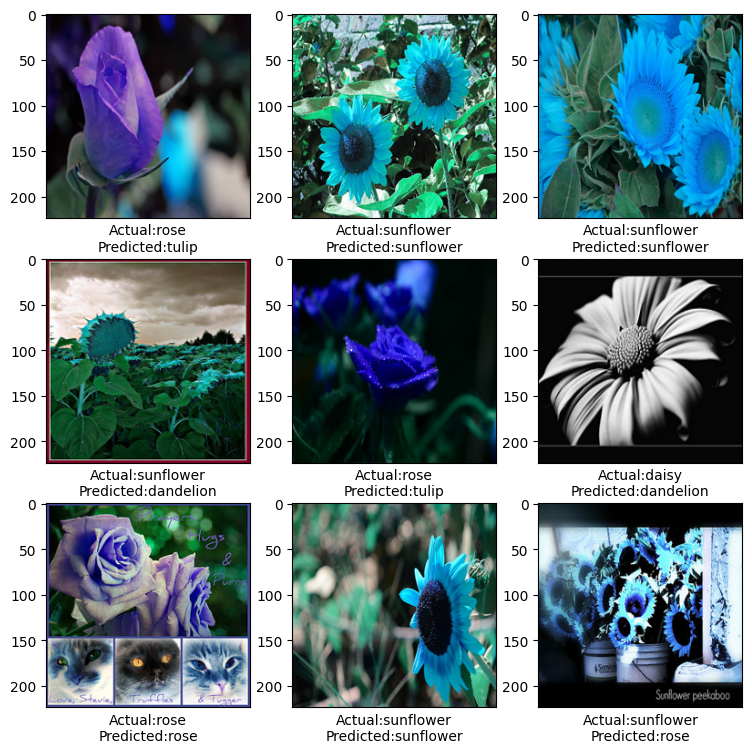

AttributeError: module 'PIL.Image' has no attribute 'load_img'

In [24]:
from keras.models import load_model
import numpy as np
from PIL import Image
# img_path = 'doit.jpg'
model = load_model('')
prediction=model.predict(X_test)
model.evaluate(X_test,y_test,verbose=1)
plt.figure(figsize=(9,9))
mylst=["dandelion", "daisy", "sunflower", "tulip", "rose"]
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i])
    plt.xlabel("Actual:"+mylst[y_test[i]]+'\n'+"Predicted:"+mylst[np.argmax(prediction[i])])
    plt.xticks([])
plt.show()
img_path = '/kaggle/input/flowers-recognition/flowers/daisy/100080576_f52e8ee070_n.jpg'

# mylst=["daisy","rose","tulip","dandelion","sunflower"]
img = Image.load_img(img_path, target_size=(224, 224 ))  # Adjust target_size according to your model
img_array = Image.img_to_array(img)
img_array = preprocess_input(img_array)
img_array = img_array.reshape((1,) + img_array.shape)  
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
print(mylst[predicted_class])